In [ ]:
# /Users/canderson/miniconda3/envs/cu-cpbs-7602/bin/python /Users/canderson/Documents/school/CPBS7602-class/assignment-01/version001/src/py/004*.py
import pandas as pd
import numpy as np  
import os 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import HDBSCAN
from sklearn.metrics import silhouette_score 
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture

In [48]:
os.chdir("/Users/canderson/Documents/school/CPBS7602-class/assignment-01/version001")

In [49]:
# load data
dat_dict = pickle.load( open("processed-data/003-dat-dict.pkl", 'rb') )

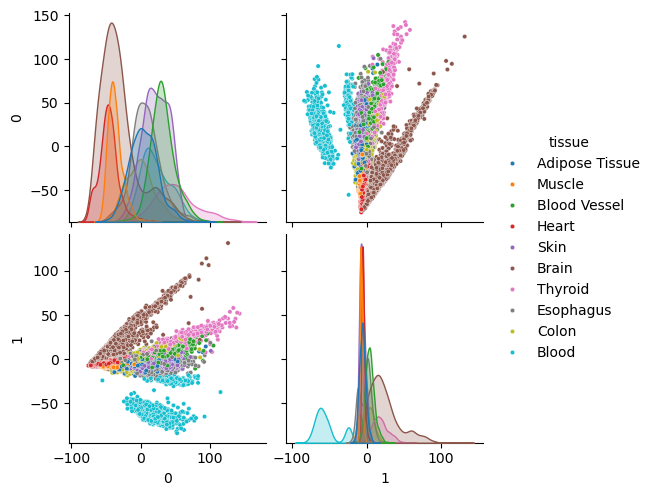

In [50]:
df = pd.DataFrame(np.transpose(dat_dict['rDims']["PCA"]["scores"])).iloc[:, :2].copy()
df["tissue"] = dat_dict["colData"]["SMTS"].values
sns.pairplot(df,
             hue="tissue",
             plot_kws={'s': 10})
plt.show()
plt.close()

In [51]:
def print_keys(d, indent=0):
    if isinstance(d, dict):
        for key in d.keys():
            print("  " * indent + str(key))
            print_keys(d[key], indent + 1)

In [52]:
print_keys(dat_dict)

counts
rowData
colData
logcounts
rDims
  PCA
    scores
    attributes


In [53]:
# object to cluster
X=dat_dict['rDims']['PCA']['scores'].T
true_class = dat_dict["colData"]['SMTS']

### Cluster using hdbscan

In [54]:
# # look at silhouett and nmi scores
# res = []
# for n in range(10,200,25):
#     hdb = HDBSCAN(min_cluster_size=n)
#     clusters = hdb.fit_predict(X)
#     ss= silhouette_score(X, clusters)
#     ars= adjusted_rand_score(true_class, clusters)
#     nmi = normalized_mutual_info_score(true_class, clusters)
#     res.append({"n": n,
#                 "nmi": nmi,
#                 'ars':ars, 
#                 'ss':ss})

In [55]:
# res=pd.DataFrame(res)
# sns.pairplot(res)
print('     n       nmi       ars        ss\n0   10  0.247012  0.043196  0.240097\n1   35  0.557894  0.199204  0.023769\n2   60  0.557668  0.198098  0.035695\n3   85  0.552868  0.198300  0.031063\n4  110  0.537636  0.183685  0.042407\n5  135  0.517749  0.163482  0.033979\n6  160  0.222869  0.032342  0.237411\n7  185  0.205565  0.032465  0.214297')

     n       nmi       ars        ss
0   10  0.247012  0.043196  0.240097
1   35  0.557894  0.199204  0.023769
2   60  0.557668  0.198098  0.035695
3   85  0.552868  0.198300  0.031063
4  110  0.537636  0.183685  0.042407
5  135  0.517749  0.163482  0.033979
6  160  0.222869  0.032342  0.237411
7  185  0.205565  0.032465  0.214297


In [56]:
np.random.seed(1293)
hdb = HDBSCAN(min_cluster_size=85)
clusters = hdb.fit_predict(X)

In [57]:
# Build the plotting dataframe
plot_df = pd.DataFrame(X[:,:2], 
                       columns=["PC1", "PC2"])
plot_df["cluster"] = pd.Series(clusters)

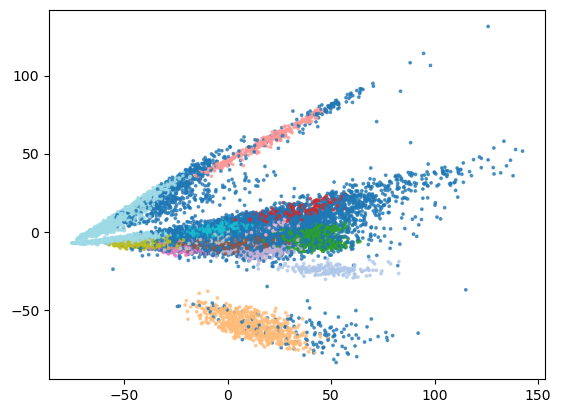

In [58]:
plt.scatter(
    plot_df["PC1"],
    plot_df["PC2"],
    c=plot_df["cluster"],
    cmap="tab20",   
    s=3,
    alpha=0.7
)

In [59]:
ss= silhouette_score(X, clusters)
ars= adjusted_rand_score(true_class, clusters)
nmi = normalized_mutual_info_score(true_class, clusters)
print(f"Silhouette Score: {ss}")
print(f"Adjusted Rand Score: {ars}")
print(f"NMI Score: {nmi}")

Silhouette Score: 0.031062960511735783
Adjusted Rand Score: 0.19829982050484213
NMI Score: 0.552868125206802


In [60]:
# add clusters to colData
dat_dict["colData"]['hdb_clusters'] = clusters

### Cluster using GMM

In [61]:
# # find lowest BIC
# res = []
# for i in range(2, 15):
#     gmm = GaussianMixture(n_components=i, random_state=0)
#     gmm.fit(X)
#     BIC = gmm.bic(X)
#     res.append({"i": i, "BIC": BIC})

In [62]:
# res = pd.DataFrame(res)
# resp(res)
print('     i           BIC\n0    2  3.071488e+06\n1    3  2.893221e+06\n2    4  2.761307e+06\n3    5  2.546933e+06\n4    6  2.406676e+06\n5    7  2.331123e+06\n6    8  2.362337e+06\n7    9  2.256024e+06\n8   10  2.198969e+06\n9   11  2.188732e+06\n10  12  2.174428e+06\n11  13  2.152318e+06\n12  14  2.138064e+06')

     i           BIC
0    2  3.071488e+06
1    3  2.893221e+06
2    4  2.761307e+06
3    5  2.546933e+06
4    6  2.406676e+06
5    7  2.331123e+06
6    8  2.362337e+06
7    9  2.256024e+06
8   10  2.198969e+06
9   11  2.188732e+06
10  12  2.174428e+06
11  13  2.152318e+06
12  14  2.138064e+06


In [ ]:
np.random.seed(1293)
gmm= GaussianMixture(n_components= 9,random_state=0) 
# ^^ 9 has best silhouette score (even though i know there's 10)

In [64]:
gmm.fit(X)
clusters = gmm.predict(X)

In [65]:
plot_df["cluster"] = pd.Series(clusters)

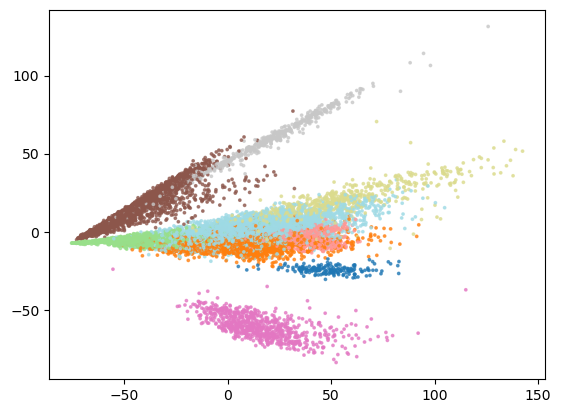

In [66]:
plt.scatter(
    plot_df["PC1"],
    plot_df["PC2"],
    c=plot_df["cluster"],
    cmap="tab20",   
    s=3,
    alpha=0.7
)

In [67]:
ss= silhouette_score(X, clusters)
ars= adjusted_rand_score(true_class, clusters)
nmi= normalized_mutual_info_score(true_class, clusters)
print(f"Silhouette Score: {ss}")
print(f"Adjusted Rand Score: {ars}")
print(f"NMI: {nmi}")

Silhouette Score: 0.2553896811284711
Adjusted Rand Score: 0.5071460177486199
NMI: 0.7415968020378886


In [68]:
dat_dict["colData"]['gmm_clusters'] = clusters

### Save data

In [69]:
print("Saving...")
pickle.dump(dat_dict, open("processed-data/004-dat-dict.pkl", "wb"))
print("Done")

Saving...
Done
